# Clustering Project
## Absenteeism at work <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

## Attribute Information:

1. Individual identification (ID) <br>
2. Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: <br>

 0 No absence <br>

 I Certain infectious and parasitic diseases<br>
II Neoplasms <br>
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism <br>
IV Endocrine, nutritional and metabolic diseases <br>
V Mental and behavioural disorders <br>
VI Diseases of the nervous system <br>
VII Diseases of the eye and adnexa <br>
VIII Diseases of the ear and mastoid process <br>
IX Diseases of the circulatory system <br>
X Diseases of the respiratory system <br>
XI Diseases of the digestive system <br>
XII Diseases of the skin and subcutaneous tissue <br>
XIII Diseases of the musculoskeletal system and connective tissue <br>
XIV Diseases of the genitourinary system <br>
XV Pregnancy, childbirth and the puerperium <br>
XVI Certain conditions originating in the perinatal period <br>
XVII Congenital malformations, deformations and chromosomal abnormalities <br>
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified <br>
XIX Injury, poisoning and certain other consequences of external causes <br>
XX External causes of morbidity and mortality <br>
XXI Factors influencing health status and contact with health services. <br>

 #### Categories without (CID): 
 XXII Patient follow-up <br>
XXIII Medical consultation <br> 
XXIV Blood donation <br>
XXV Laboratory examination <br> 
XXVI Unjustified absence <br> 
XXVII Physiotherapy <br>
XXVIII Dental consultation <br>

3. Month of absence <br>
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) <br>
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) <br>
6. Transportation expense <br>
7. Distance from Residence to Work (kilometers) <br>
8. Service time <br>
9. Age <br>
10. Work load Average/day <br>
11. Hit target <br>
12. Disciplinary failure (yes=1; no=0) <br>
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) <br>
14. Son (number of children) <br>
15. Social drinker (yes=1; no=0) <br>
16. Social smoker (yes=1; no=0) <br>
17. Pet (number of pet) <br>
18. Weight <br>
19. Height <br>
20. Body mass index <br> <br>
21. Absenteeism time in hours (target - for final evaluation only)

#### Timing the script

In [1]:
from datetime import datetime
startTime = datetime.now()

#### Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Basic libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

#### Importing the data:

In [4]:
df = pd.read_csv('Absenteeism_at_work.csv')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


## Exploratory Data Analysis (EDA):

#### Basic info, only numerical data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#### Checking for missing data:

In [6]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

#### Basic statistics:

In [7]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### Reasons for absence:

In [8]:
a = df['Reason for absence'].unique()
a.sort()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

Reason 20 (External causes of morbidity and mortality) does not occur among respondents.

In [9]:
reasons = ['Certain infectious and parasitic diseases',
           'Neoplasms',
           'Diseases of the blood and immune disorders',
           'Endocrine, nutritional and metabolic diseases',
           'Mental and behavioural disorders',
           'Diseases of the nervous system',
           'Diseases of the eye and adnexa',
           'Diseases of the ear and mastoid process',
           'Diseases of the circulatory system',
           'Diseases of the respiratory system',
           'Diseases of the digestive system',
           'Diseases of the skin and subcutaneous tissue',
           'Diseases of the musculoskeletal system',
           'Diseases of the genitourinary system',

           'Pregnancy, childbirth and the puerperium',
           'Certain conditions in the perinatal period',
           'Congenital malformations, deformations',
           'Symptoms, signs and abnormal clinical findings',
           'Injury, poisoning and certain other consequences',
           'External causes of morbidity and mortality',
           'Factors influencing health status',

           'Patient follow-up',
           'Medical consultation',
           'Blood donation',
           'Laboratory examination',
           'Unjustified absence',
           'Physiotherapy',
           'Dental consultation']

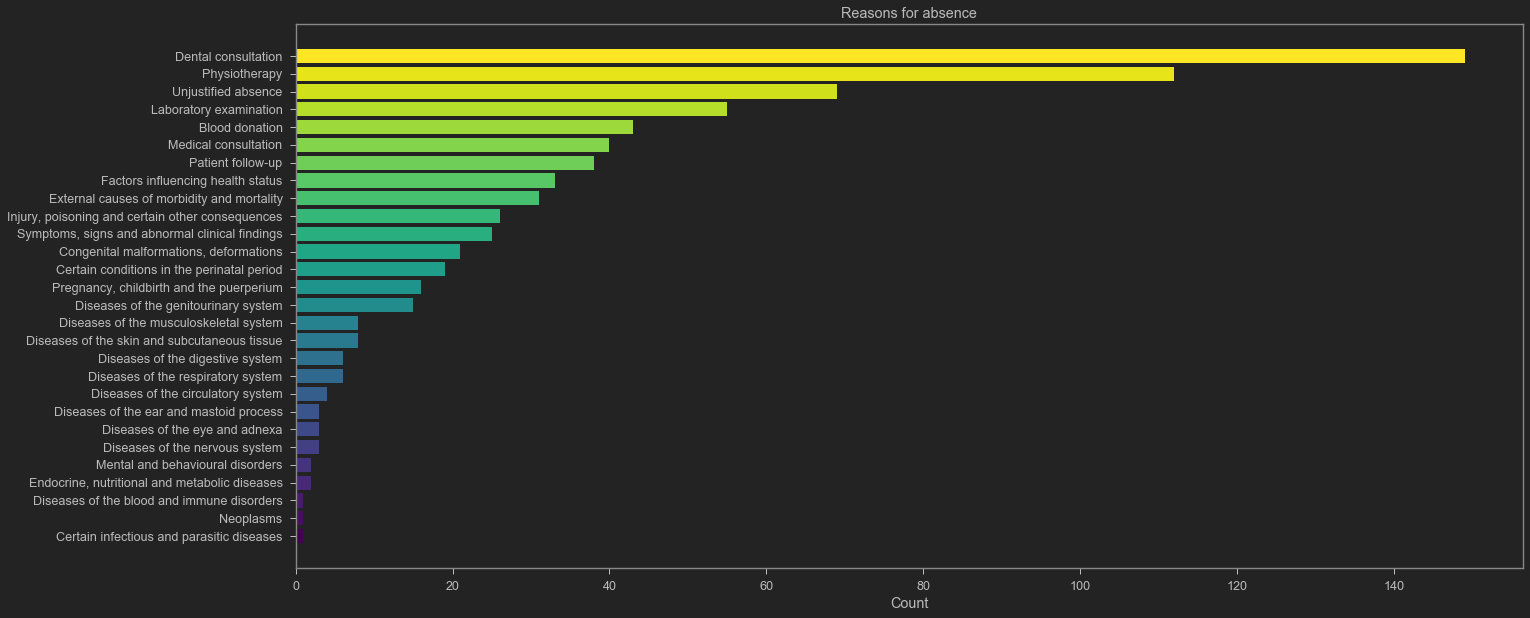

In [10]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 28)

fig, ax = plt.subplots(figsize=(22,10))

ax.barh(y=np.arange(len(reasons)), 
        width=df['Reason for absence'].value_counts().sort_values(),
        tick_label=reasons,
        color=viridis(np.linspace(0, 1, 28)))

ax.set_xlabel('Count')
ax.set_title('Reasons for absence')
plt.show()

#### ID is like a name and does not add any value, so it can be dropped:

In [11]:
df.drop('ID', axis=1, inplace=True)

#### Grouping 'Reason for absence' into 5 main categories:
   0 - Present (to be dropped to avoid data leakage) <br>
   1-14 - Diseases <br>
   15-17 - Pregnacy related <br>
   18-21 - Various injuries <br>
   22-28 - Light, unserious reasons

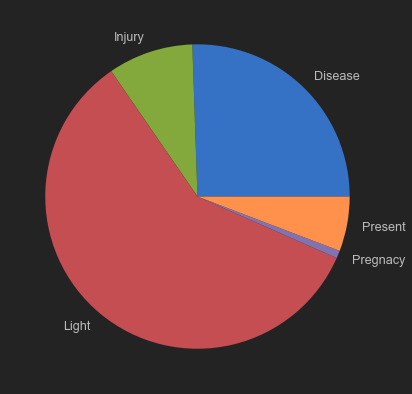

In [12]:
def reason(record):
    if record == 0:
        return 'Present'
    elif (record > 0) & (record < 15):
        return 'Disease'
    elif (record > 14) & (record < 18):
        return 'Pregnacy'
    elif (record > 17) & (record < 22):
        return 'Injury'
    else:
        return 'Light'
    
df['Reason for absence'] = df['Reason for absence'].apply(reason)

plt.figure(figsize=(7,7))
df.groupby('Reason for absence').size().plot(kind='pie', label='');

Light reasons for absence such as dental appointment are the most common. Large imbalance between present and absent records.

### Month:

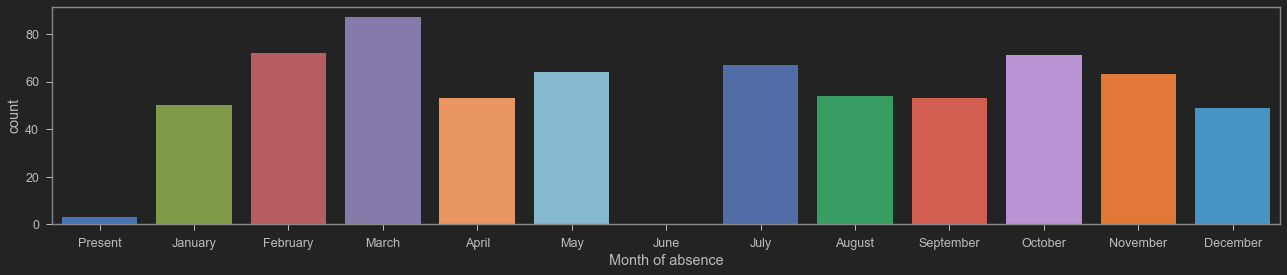

In [13]:
d={0:'Present', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
   7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['Month of absence'] = df['Month of absence'].map(d)

plt.figure(figsize=(22,4))
sns.countplot(df['Month of absence'],
              order=['Present', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 
                     'August', 'September', 'October', 'November', 'December']);

#### Day of the week:

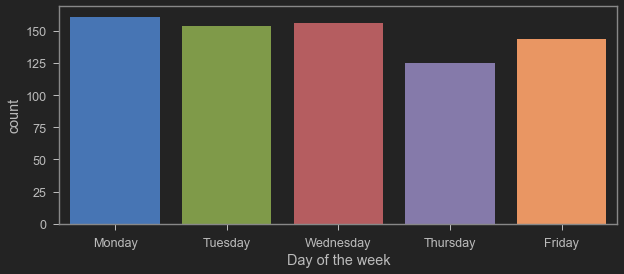

In [14]:
d={2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
df['Day of the week'] = df['Day of the week'].map(d)

plt.figure(figsize=(10,4))
sns.countplot(df['Day of the week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']);

#### Seasons:

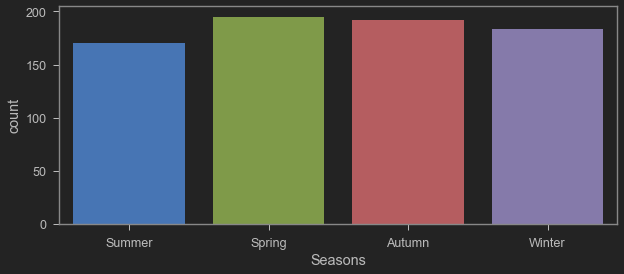

In [15]:
d={1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df['Seasons'] = df['Seasons'].map(d)

plt.figure(figsize=(10,4))
sns.countplot(df['Seasons']);

#### Transportation expense:

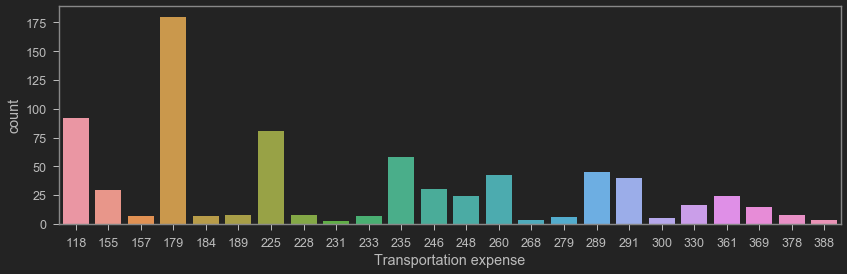

In [16]:
plt.figure(figsize=(14,4))
sns.countplot(df['Transportation expense']);

#### Distance from residence to work:

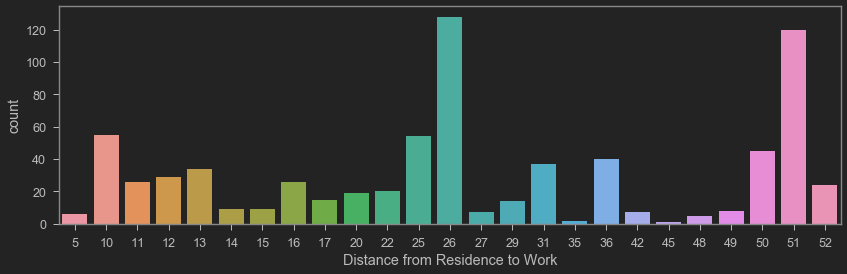

In [17]:
plt.figure(figsize=(14,4))
sns.countplot(df['Distance from Residence to Work']);

#### Service time:

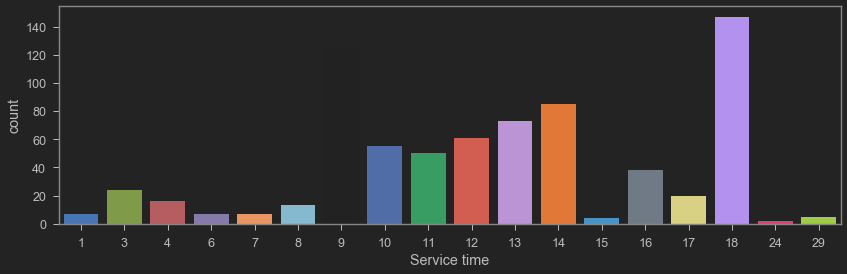

In [18]:
plt.figure(figsize=(14,4))
sns.countplot(df['Service time']);

#### Age:

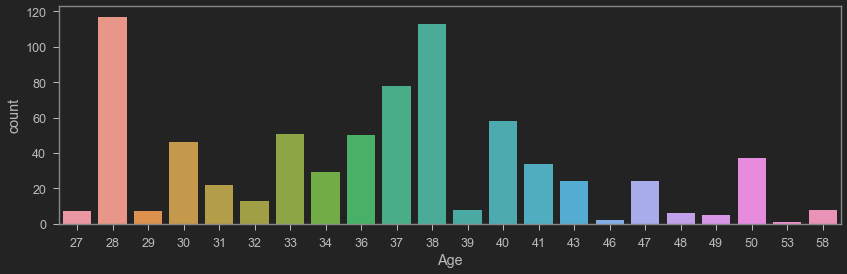

In [19]:
plt.figure(figsize=(14,4))
sns.countplot(df['Age']);

#### Workload Average/day:

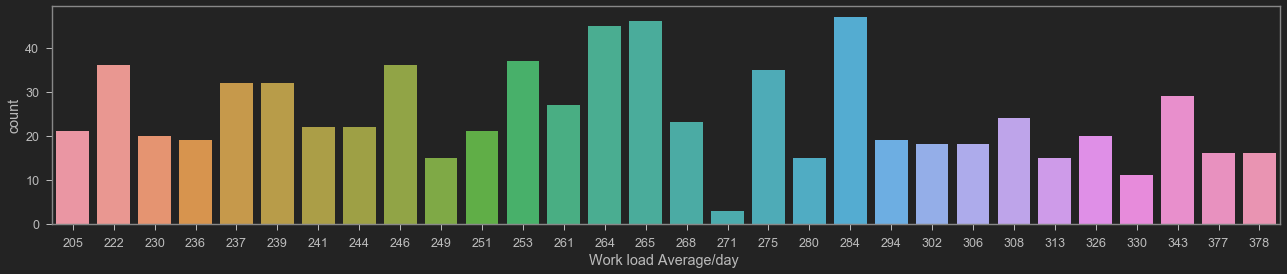

In [20]:
plt.figure(figsize=(22,4))
sns.countplot(df['Work load Average/day '].astype(int));

#### Hit target:

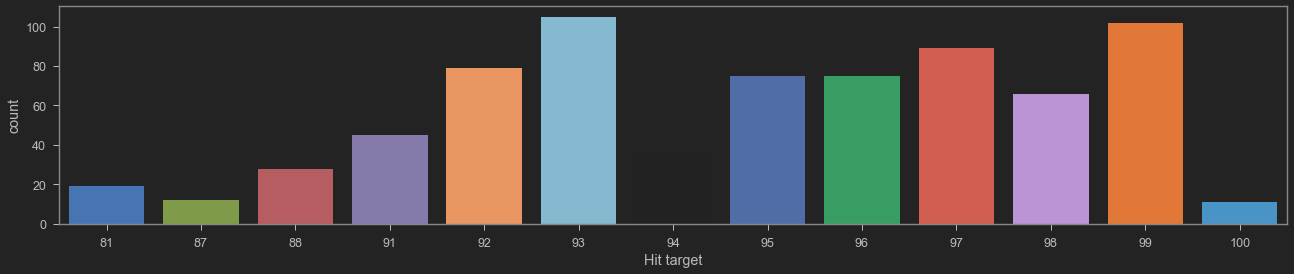

In [21]:
plt.figure(figsize=(22,4))
sns.countplot(df['Hit target']);

#### Disciplinary failure:
1 - Yes, 0 - No

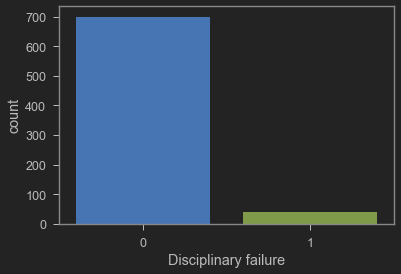

In [22]:
sns.countplot(df['Disciplinary failure']);

#### Education 
High school (1), Graduate (2), Postgraduate (3), Master and doctor (4)

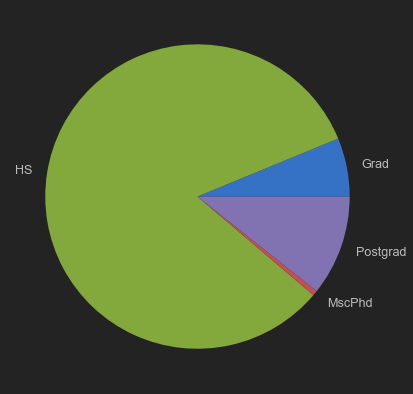

In [23]:
d={1:'HS', 2:'Grad', 3:'Postgrad', 4:'MscPhd'}
df['Education'] = df['Education'].map(d)

plt.figure(figsize=(7,7))
df.groupby('Education').size().plot(kind='pie', label='');

#### Number of children:

In [24]:
df=df.rename(columns = {'Son':'Kids'})

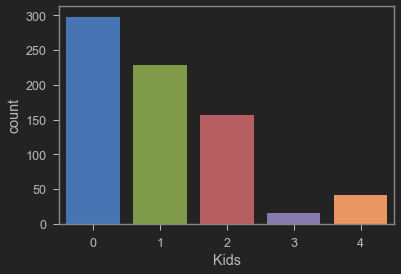

In [25]:
sns.countplot(df['Kids']);

#### Social drinker:

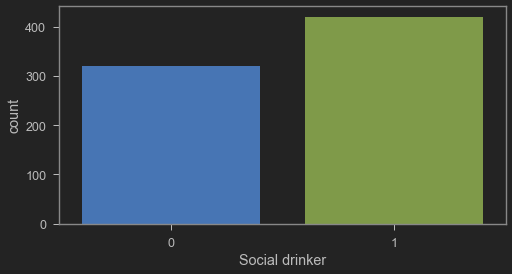

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(df['Social drinker']);

#### Social smoker:

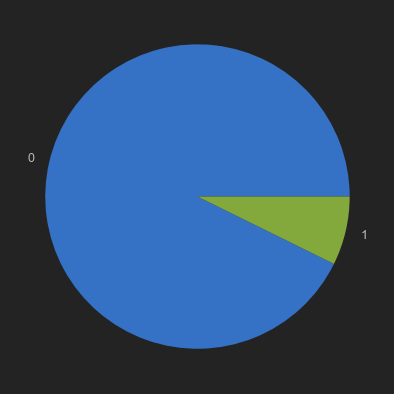

In [27]:
plt.figure(figsize=(7,7))
df.groupby('Social smoker').size().plot(kind='pie', label='');

#### Number of pets:

In [28]:
df=df.rename(columns = {'Pet':'Pets'})

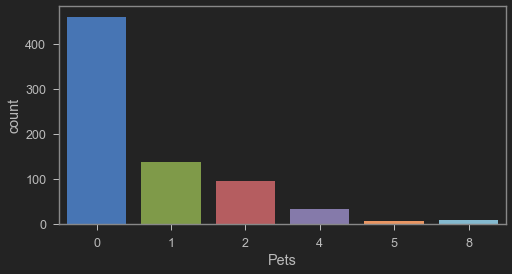

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(df['Pets']);

#### Weight:

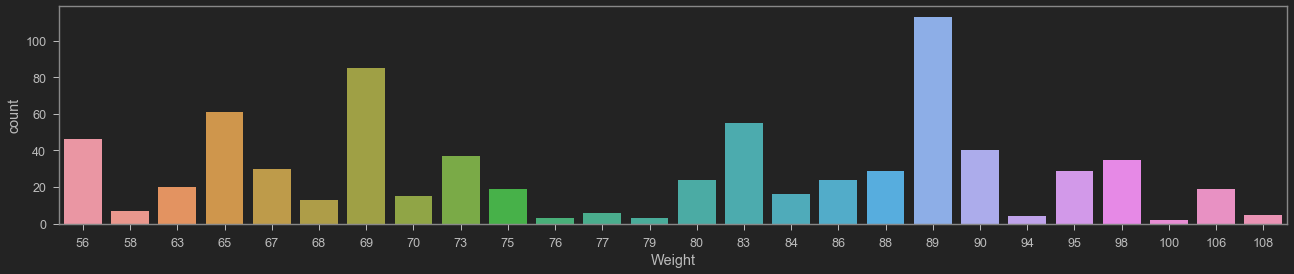

In [30]:
plt.figure(figsize=(22,4))
sns.countplot(df['Weight']);

#### Body mass index:

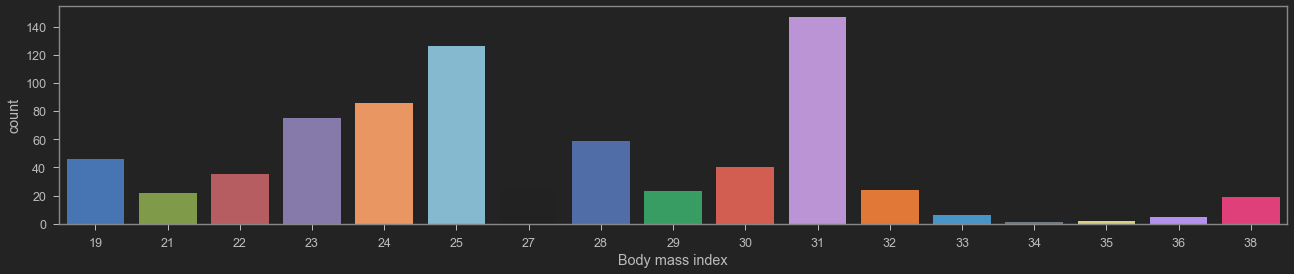

In [31]:
plt.figure(figsize=(22,4))
sns.countplot(df['Body mass index']);

#### Absenteeism time in hours:

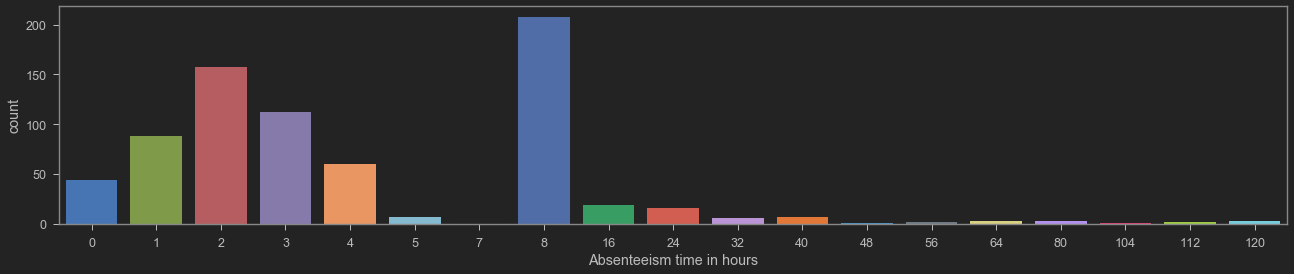

In [32]:
plt.figure(figsize=(22,4))
sns.countplot(df['Absenteeism time in hours']);

### Excessive absenteeism:
Using binary categories with a threshold of a median of absence time.

In [33]:
# df['Absenteeism time in hours'].median()

# df['Excessive absenteeism'] = np.where(df['Absenteeism time in hours'] > 
#                                        df['Absenteeism time in hours'].median(), 1, 0)

#df.drop('Absenteeism time in hours', axis=1, inplace=True)

#### Separating the target column from the dataset:
Clustering is an unsupervised technique. The target column, required for classification is kept only for evaluation.

In [34]:
X = df.drop('Absenteeism time in hours', axis=1)
y = df['Absenteeism time in hours']

#### Dummies - Reason for absence:

In [35]:
df_reason = pd.get_dummies(X['Reason for absence'])
df_reason.drop('Present', axis=1, inplace=True)
X.drop('Reason for absence', axis=1, inplace=True)

#### Dummies - Reason for month:

In [36]:
df_month = pd.get_dummies(X['Month of absence'])
df_month.drop('Present', axis=1, inplace=True)
X.drop('Month of absence', axis=1, inplace=True)

#### Drop 'Body mass index'
Because it is very similar to 'Weight'.

In [37]:
X.drop('Body mass index', axis=1, inplace=True)

#### Get dummies for all:

In [38]:
X = pd.get_dummies(X, drop_first=True)

#### Concatenate dummy DataFrames to original DataFrame:

In [39]:
X = pd.concat([df_reason, df_month, X], axis=1)

## Final DataFrame:

In [40]:
X.columns

Index(['Disease', 'Injury', 'Light', 'Pregnacy', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Kids',
       'Social drinker', 'Social smoker', 'Pets', 'Weight', 'Height',
       'Day of the week_Monday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Education_HS',
       'Education_MscPhd', 'Education_Postgrad'],
      dtype='object')

In [41]:
X

,Disease,Injury,Light,Pregnacy,April,August,December,February,January,July,...,Day of the week_Monday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Education_HS,Education_MscPhd,Education_Postgrad
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
736,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
737,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


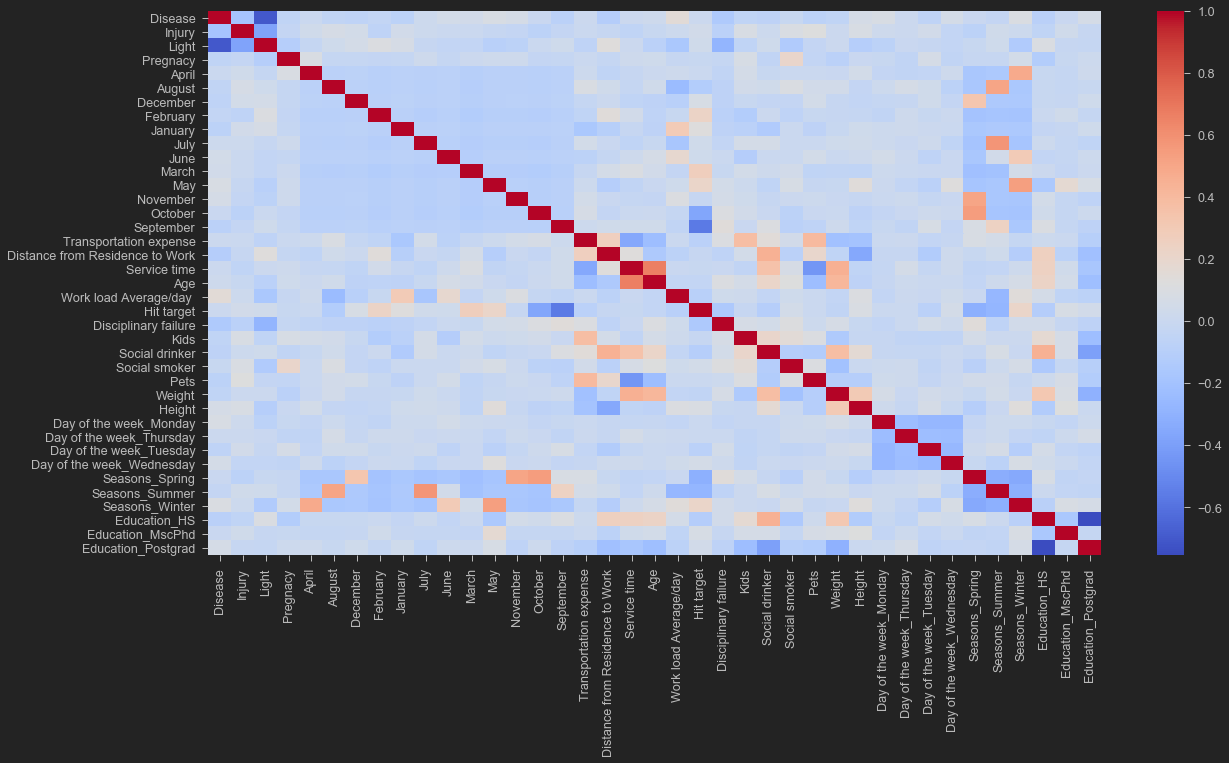

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap='coolwarm');

## Scaling:

In [43]:
from sklearn.preprocessing import StandardScaler

continuous_columns = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average/day ', 'Hit target', 'Kids', 'Pets', 
                      'Weight', 'Height']
scaler = StandardScaler()
X.loc[:, continuous_columns] = scaler.fit_transform(X.loc[:, continuous_columns])

### PCA:

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19477321, 0.12608046])

### Principal components for each row:

In [45]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.489667,0.935494
1,-3.371068,-0.235859
2,-1.416839,1.162363
3,0.084299,0.100714
4,0.498082,0.966006
...,...,...
735,0.487138,0.968296
736,-0.438037,-0.589667
737,0.408801,0.180456
738,-0.367997,1.235820


## Elbow method:
WCSS (Within-Cluster-Sum-of-Squares) is the sum of squares of the distances of each data point in all clusters to their respective centroids.

In [46]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 31):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

#### Plotting elbow method results:

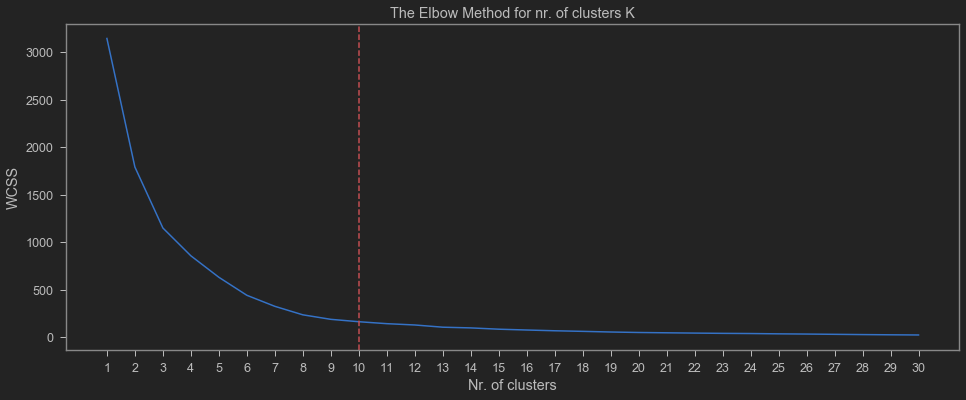

In [47]:
plt.figure(figsize=(16,6))

plt.plot(range(1, 31), wcss)

plt.title('The Elbow Method for nr. of clusters K')
plt.xlabel('Nr. of clusters')
plt.ylabel('WCSS')
plt.xticks(ticks=np.arange(1,31))
plt.axvline(x=10, color='r', linestyle='--')
plt.show()

## K-Means with chosen K clusters:

In [48]:
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                random_state=42)

y_kmeans = kmeans.fit_predict(X_pca)

### Plotting clustering results:

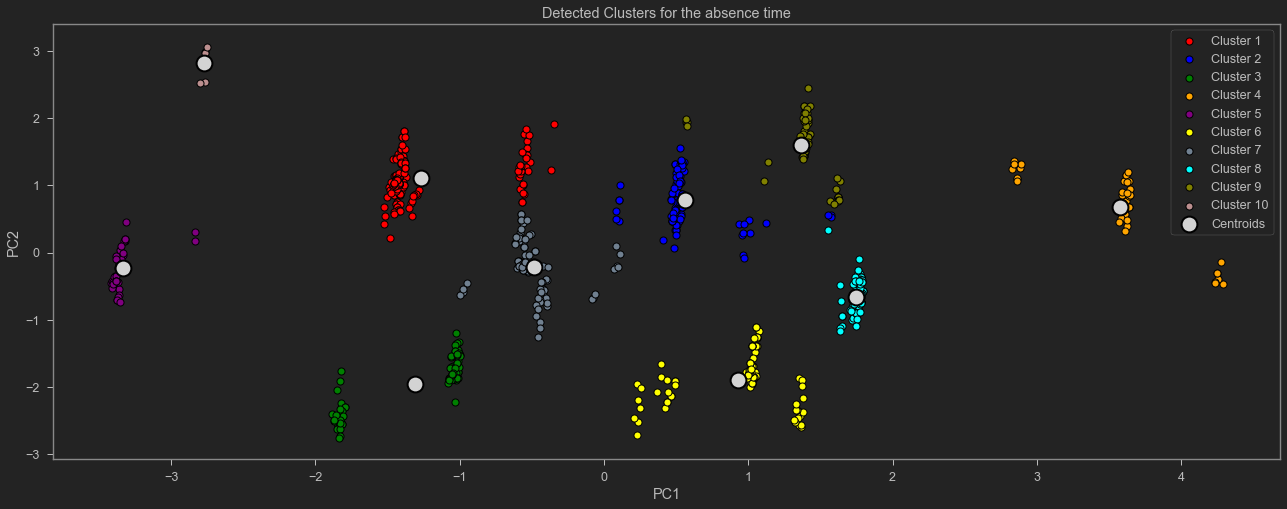

In [49]:
plt.figure(figsize=(22,8))

colors=iter(['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'slategrey', 'cyan', 'olive', 'rosybrown'])

for k in np.arange(0,10):
    plt.scatter(X_pca[y_kmeans == k, 0], #[rows, principal component 1]
                X_pca[y_kmeans == k, 1], #[rows, principal component 2]
                s=50, 
                c=next(colors),
                edgecolor='black', 
                linewidth='1',
                label=f'Cluster {k+1}')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=250, 
            c='lightgrey',
            edgecolor='black', 
            linewidth='2',
            label='Centroids')

plt.title('Detected Clusters for the absence time')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Dendrogram
Another approach to find optimal number of clusters:

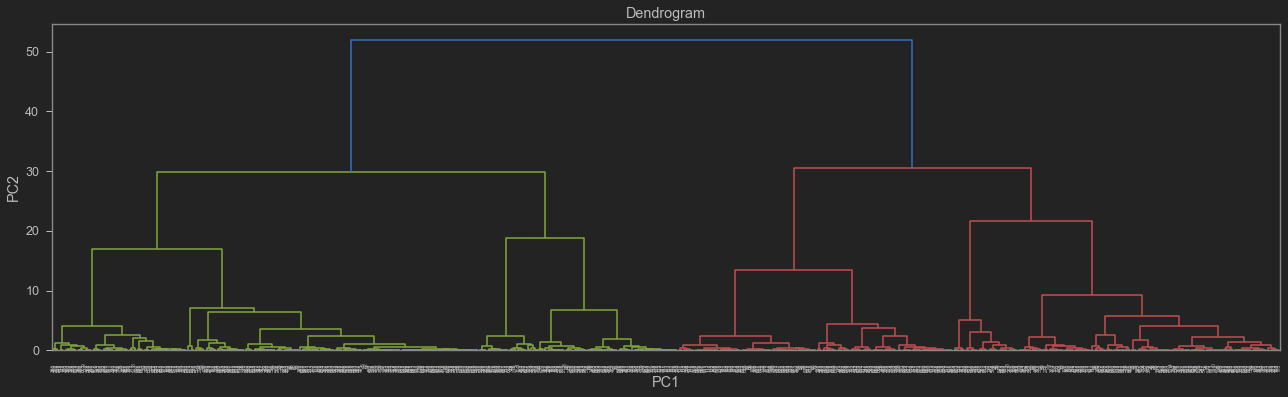

In [50]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(22,6))

dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward')) #Ward variance minimization algorithm

plt.title('Dendrogram')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The longest vertical line which is not intersected by any horizontal line is blue: 2 clusters.

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)

### Plotting clustering results:

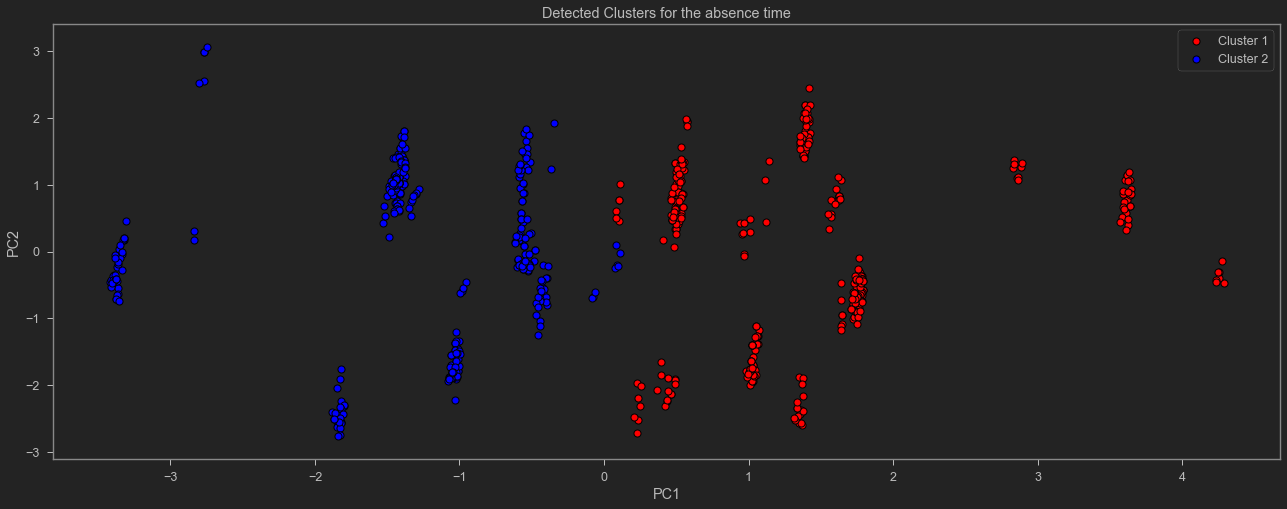

In [52]:
plt.figure(figsize=(22,8))

colors=iter(['red', 'blue'])

for k in np.arange(0,2):
    plt.scatter(X_pca[y_hc == k, 0], #[rows, principal component 1]
                X_pca[y_hc == k, 1], #[rows, principal component 2]
                s=50, 
                c=next(colors),
                edgecolor='black', 
                linewidth='1',
                label=f'Cluster {k+1}')

plt.title('Detected Clusters for the absence time')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Total execution time:

In [53]:
print(datetime.now() - startTime)

0:00:29.724743
